In [73]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
from xgboost import XGBRegressor

In [74]:
import pandas as pd

df = pd.read_csv(
    r'D:\All project set\Projects\ML Project\Sales Prediction\Sales_Dataset.csv',
    encoding='latin1'
)

print('Shape:', df.shape)
df.head()


Shape: (9994, 23)


,Row ID,Order ID,Year,Order Date,Ship Date,shipment days,Ship Mode,Customer ID,Customer Name,Segment,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2013-152156,2013,09-11-2013,12-11-2013,3,Second Class,CG-12520,Claire Gute,Consumer,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2013-152156,2013,09-11-2013,12-11-2013,3,Second Class,CG-12520,Claire Gute,Consumer,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2013-138688,2013,13-06-2013,17-06-2013,4,Second Class,DV-13045,Darrin Van Huff,Corporate,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2012-108966,2012,11-10-2012,18-10-2012,7,Standard Class,SO-20335,Sean O'Donnell,Consumer,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2012-108966,2012,11-10-2012,18-10-2012,7,Standard Class,SO-20335,Sean O'Donnell,Consumer,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [75]:
df.columns = df.columns.str.replace('\xa0','', regex=True).str.strip()

for col in df.select_dtypes(include='object').columns:
    df[col] = df[col].str.replace('\xa0',' ', regex=True).str.strip()

In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Year           9994 non-null   int64  
 3   Order Date     9994 non-null   object 
 4   Ship Date      9994 non-null   object 
 5   shipment days  9994 non-null   int64  
 6   Ship Mode      9994 non-null   object 
 7   Customer ID    9994 non-null   object 
 8   Customer Name  9994 non-null   object 
 9   Segment        9994 non-null   object 
 10  Country        9994 non-null   object 
 11  City           9994 non-null   object 
 12  State          9994 non-null   object 
 13  Postal Code    9994 non-null   int64  
 14  Region         9994 non-null   object 
 15  Product ID     9994 non-null   object 
 16  Category       9994 non-null   object 
 17  Sub-Category   9994 non-null   object 
 18  Product 

In [77]:
print('Missing Values: \n',df.isnull().sum())

Missing Values: 
 Row ID           0
Order ID         0
Year             0
Order Date       0
Ship Date        0
shipment days    0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64


In [78]:
print('Duplicated values:',df.duplicated().sum())

Duplicated values: 0


In [79]:
df.describe()

,Row ID,Year,shipment days,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,2012.722934,3.958875,55190.379428,229.858001,3.789574,0.156203,28.656896
std,2885.163629,1.124039,1.747097,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1.000000,2011.000000,0.000000,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,2012.000000,3.000000,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,2013.000000,4.000000,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,2014.000000,5.000000,90008.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,2014.000000,7.000000,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [80]:
print('Features: \n',df.columns.tolist())

Features: 
 ['Row ID', 'Order ID', 'Year', 'Order Date', 'Ship Date', 'shipment days', 'Ship Mode', 'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State', 'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category', 'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit']


In [81]:
target_col = 'Sales'  # change if different
df = df.dropna(subset=[target_col])

In [82]:
X = df.drop(columns=[target_col], axis=1)
y = df[target_col]

num_cols = X.select_dtypes(include=[np.number]).columns.tolist()
cat_cols = X.select_dtypes(include=['object','category','bool']).columns.tolist()


In [83]:
preprocessor = ColumnTransformer([
    ('num', StandardScaler(), num_cols),
    ('cat', OneHotEncoder(handle_unknown='ignore'), cat_cols)
])

In [84]:
pipelines = {
    'LinearRegression': Pipeline([
        ('preproc', preprocessor),
        ('reg', LinearRegression())
    ]),
    'RandomForest': Pipeline([
        ('preproc', preprocessor),
        ('reg', RandomForestRegressor(random_state=42))
    ]),
    'XGBRegressor': Pipeline([
        ('preproc', preprocessor),
        ('reg', XGBRegressor(random_state=42))
    ])
}


In [85]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42
)

In [86]:
param_grids = {
    'LinearRegression': {},
    'RandomForest': {
        'reg__n_estimators': [100, 200, 300],
        'reg__max_depth': [5, 10, 15]
    },
    'XGBRegressor': {
        'reg__n_estimators': [100, 200],
        'reg__max_depth': [3, 5, 7],
        'reg__learning_rate': [0.05, 0.1]
    }
}

Tuning LinearRegression 

CV_Score: 0.2209
Best Params: {}
R2 Score: 0.1889
Mean Absolute Error: 243.9823
Mean Squared Error: 448904.4801
RMSE Score: 670.0033


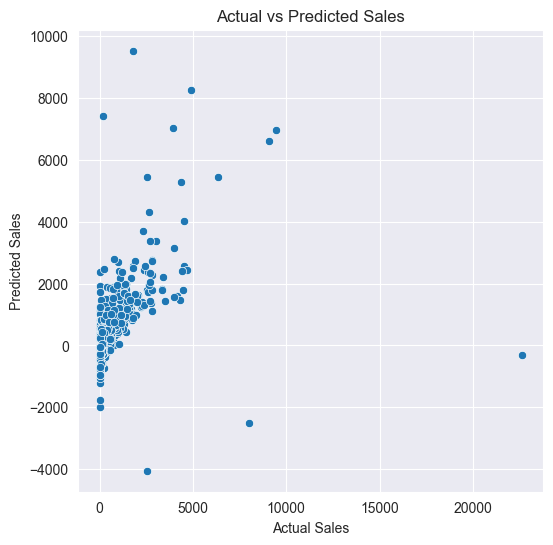

Tuning RandomForest 

CV_Score: 0.8303
Best Params: {'reg__max_depth': 15, 'reg__n_estimators': 200}
R2 Score: 0.5561
Mean Absolute Error: 83.9118
Mean Squared Error: 245682.5884
RMSE Score: 495.6638


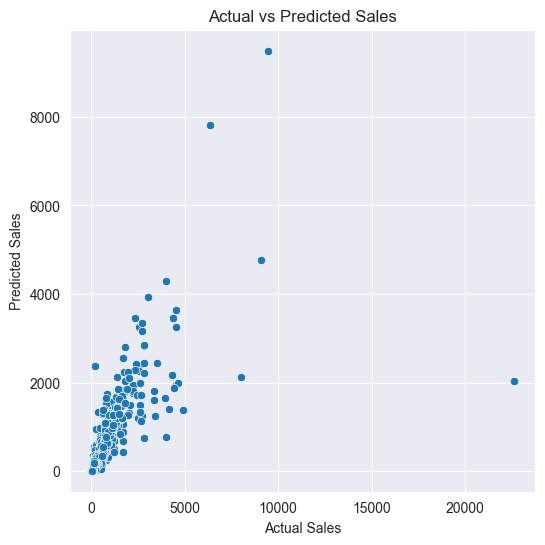

Tuning XGBRegressor 

CV_Score: 0.8125
Best Params: {'reg__learning_rate': 0.1, 'reg__max_depth': 5, 'reg__n_estimators': 200}
R2 Score: 0.5022
Mean Absolute Error: 92.7116
Mean Squared Error: 275495.6861
RMSE Score: 524.8768


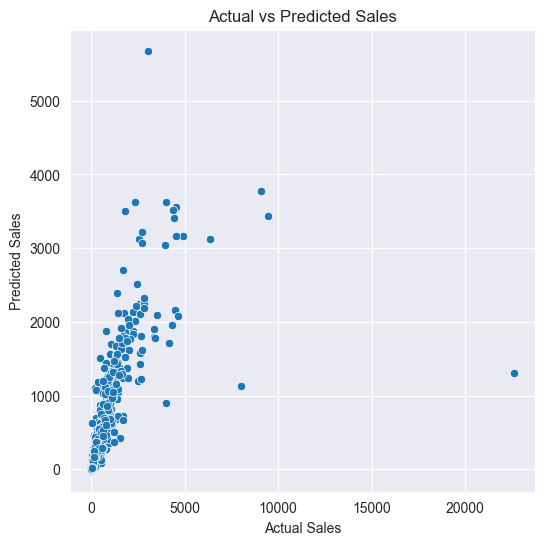

In [90]:
results = []
best_model = None
best_score = 0
best_name = None

for name, pipe in pipelines.items():
    grid = GridSearchCV(pipe, param_grids[name], cv=5, n_jobs=-1)
    grid.fit(X_train, y_train)
    model = grid.best_estimator_
    y_pred = model.predict(X_test)

    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test,y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))

    print(f'Tuning {name} \n')
    print(f'CV_Score: {grid.best_score_ :.4f}')
    print(f'Best Params: {grid.best_params_}')
    print(f'R2 Score: {r2:.4f}')
    print(f'Mean Absolute Error: {mae:.4f}')
    print(f'Mean Squared Error: {mse:.4f}')
    print(f'RMSE Score: {rmse:.4f}')

    if r2 > best_score:
        best_model = model
        best_score = r2
        best_name = name

    results.append({
        'Model':name,
        'R2':r2,
        'MAE':mae,
        'MSE':mse,
        'RMSE':rmse,
        'CV_Score':grid.best_score_})

    plt.figure(figsize=(6,6))
    sns.scatterplot(x=y_test, y=y_pred)
    plt.xlabel('Actual Sales')
    plt.ylabel('Predicted Sales')
    plt.title('Actual vs Predicted Sales')
    plt.show()


In [91]:
summary = pd.DataFrame(results)
print(summary)

              Model        R2         MAE            MSE        RMSE  CV_Score
0  LinearRegression  0.188864  243.982259  448904.480066  670.003343  0.220888
1      RandomForest  0.556070   83.911786  245682.588378  495.663786  0.830319
2      XGBRegressor  0.502200   92.711571  275495.686135  524.876829  0.812510


In [92]:
print("\n Best Model:", best_name)
print(" Best R2:", best_score)


 Best Model: RandomForest
 Best R2: 0.556070208443262


In [93]:
import joblib
save_path = r'D:\All project set\Projects\ML Project\Sales Prediction\best_model.pkl'
joblib.dump(best_model,save_path)
print('Save Successfully')

Save Successfully
